In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,List,Annotated,Literal
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from pydantic import BaseModel,Field
import operator

load_dotenv()
model = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Quadratic_eq(TypedDict):
    
    a : int
    b : int
    c : int
    
    discriminent : float
    result : str

In [7]:
def descriminent(state : Quadratic_eq) -> Quadratic_eq:
    
    a = state['a']
    b = state['b']
    c = state['c']
    
    d = b**2 - 4*a*c
    
    return {'discriminent' : d} 

def condition(state : Quadratic_eq) -> Literal['two_real_roots', 'same_roots', 'no_real_root']:
    d = state['discriminent']
    if d < 0:
        return 'no_real_root'
    elif d == 0:
        return 'same_roots'
    else:
        return 'two_real_roots'

def two_real_roots(state : Quadratic_eq):
    return {'result' : 'This eq has two real roots'}

def same_roots(state : Quadratic_eq):
    return {'result' : 'This eq has two same roots'}

def no_real_root(state : Quadratic_eq):
    return {'result' : 'This eq has no real roots'}
    

In [8]:
graph = StateGraph(Quadratic_eq)

graph.add_node('descriminent',descriminent)
graph.add_node('two_real_roots',two_real_roots)
graph.add_node('same_roots',same_roots)
graph.add_node('no_real_root',no_real_root)
# graph.add_node('condition',condition)

graph.add_edge(START, "descriminent")
graph.add_conditional_edges("descriminent", condition)
graph.add_edge('two_real_roots', END)
graph.add_edge('no_real_root', END)
graph.add_edge('same_roots', END)

workflow = graph.compile()

In [9]:
workflow.invoke({'a': 4,'b' : 5, 'c' : 6})

{'a': 4,
 'b': 5,
 'c': 6,
 'discriminent': -71,
 'result': 'This eq has no real roots'}

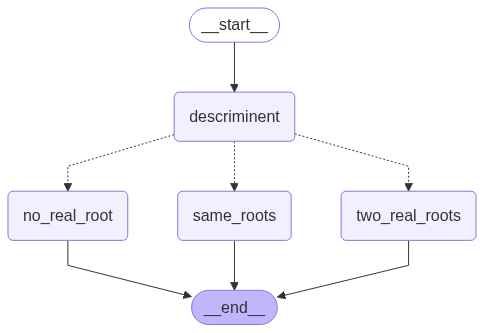

In [10]:
graph.compile()